# MNIST Dataset Analysis

In [11]:
#Imports
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print('Import successful')

Import successful


In [12]:
#Loading the data
(X_train,y_train), (X_test,y_test) = mnist.load_data()
#Flatten the image data
X_num = X_train.reshape(X_train.shape[0],-1)
y_num = y_train

X = pd.DataFrame(X_num)
y = pd.DataFrame(y_num)
print('Data loading successful')

Data loading successful


## Analyzing Shape of Data

In [13]:
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')
print(f'Unique labels: {np.unique(y)}')

Shape of X: (60000, 784)
Shape of y: (60000, 1)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


## Sample Images from the Dataset

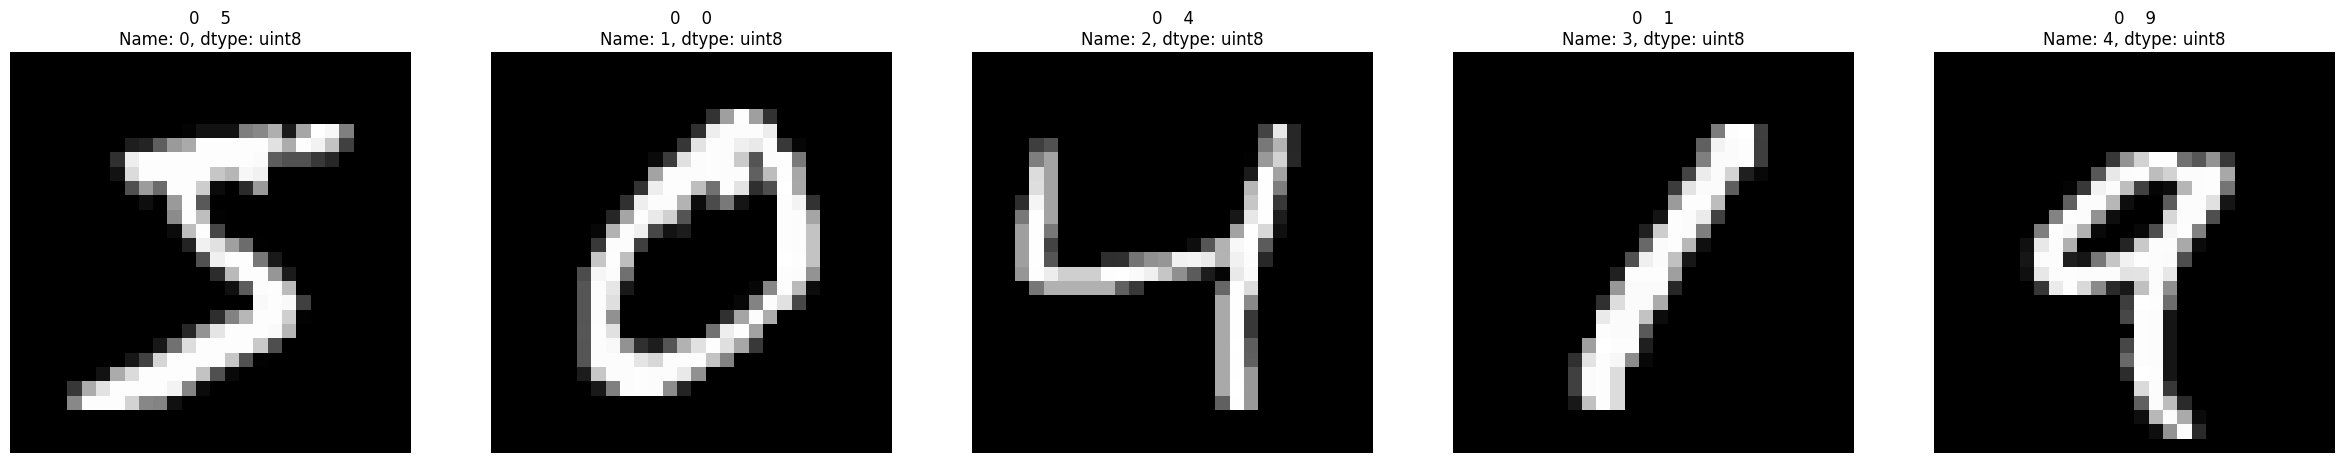

In [14]:
def plot_img(X,y,num_sampes=5):
    plt.figure(figsize=(30,30))
    for i in range(num_sampes):
        plt.subplot(1,num_sampes,i+1)
        plt.imshow(X.iloc[i].values.reshape(28,28),cmap='gray')
        plt.title(y.iloc[i])
        plt.axis('off')
    plt.show()

plot_img(X,y)    

## Distribution of Labels

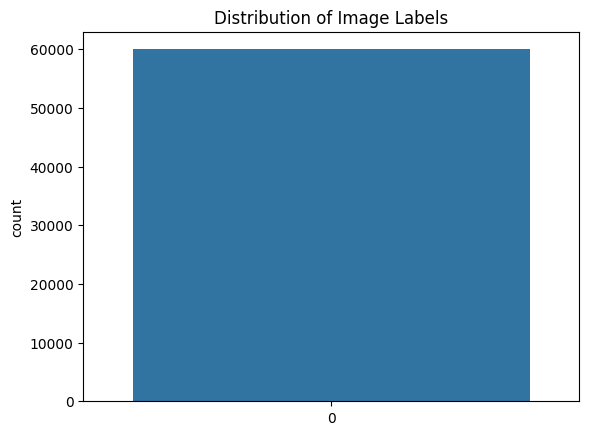

In [15]:
sns.countplot(y)
plt.title('Distribution of Image Labels')
plt.show()

## Statistical Summary

In [16]:
print('Summary of X: \n')
print(X.describe())

Summary of X: 

           0        1        2        3        4        5        6        7    \
count  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

           8        9    ...           774           775           776  \
count  60000.0  60000.0  ...  60000.000000  60000.000000  60000.000000   
mean       0.0      0.0  ...      0.200433      0.088867      0.045633   
std        0.0      0.0  ...    

In [17]:
print('Summary of y: \n')
print(y.describe())

Summary of y: 

                  0
count  60000.000000
mean       4.453933
std        2.889270
min        0.000000
25%        2.000000
50%        4.000000
75%        7.000000
max        9.000000


## Mean of Image Pixel Values

Text(0.5, 1.0, 'Mean Image')

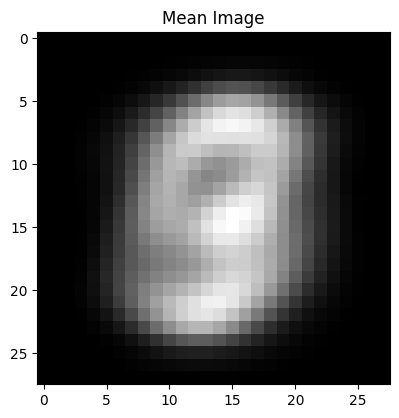

In [18]:
img_mean = X.mean(axis=0).values.reshape(28,28)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_mean,cmap='gray')
plt.title('Mean Image')

## Standard Deviation of Image pixels

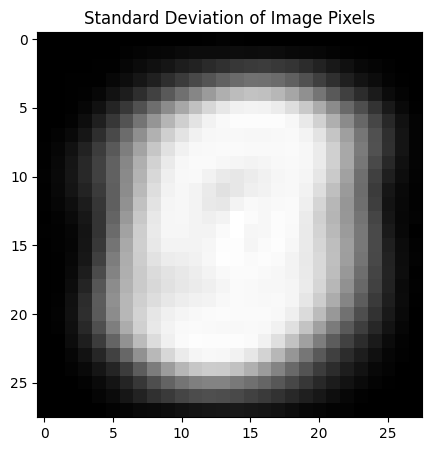

In [21]:
img_std = X.std(axis=0).values.reshape(28,28)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Standard Deviation of Image Pixels')
plt.imshow(img_std,cmap='gray')
plt.show()

## Correlation between Pixels

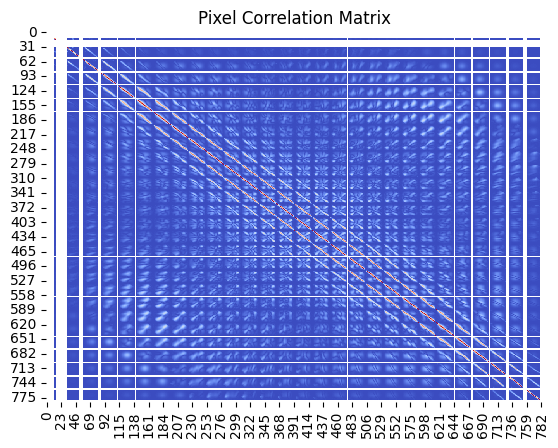

In [20]:
corr_matrix = X.corr().abs()
sns.heatmap(corr_matrix,cmap='coolwarm',cbar=False)
plt.title('Pixel Correlation Matrix')
plt.show()

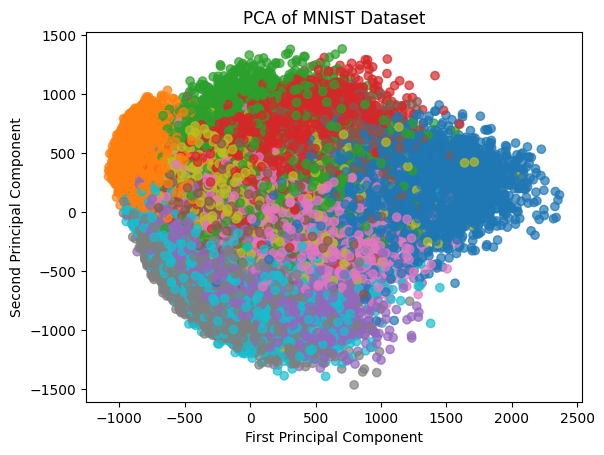

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y.astype(int), cmap='tab10', alpha=0.7)
plt.title('PCA of MNIST Dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()
